### Importing libraries and Reading data

In [1]:
# Importing useful libraries
import pandas as pd
import numpy as np
from textblob.classifiers import NaiveBayesClassifier as NBC
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading datasets
train_data = pd.read_csv(r'C:\Users\Dlc\Downloads\Genre Classification Dataset\train_data.txt',sep=':::',names=['ID','TITLE','GENRE','DESCRIPTION'])
test_data = pd.read_csv(r'C:\Users\Dlc\Downloads\Genre Classification Dataset\test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'])
test_data_sol = pd.read_csv(r'C:\Users\Dlc\Downloads\Genre Classification Dataset\test_data_solution.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'])

In [3]:
train_data.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
test_data.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [5]:
test_data_sol.head()

,ID,TITLE,DESCRIPTION
1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


### Data Preprocessing

In [6]:
train_data = train_data.drop('ID', axis=1) 
test_data = test_data.drop('ID', axis=1)

In [7]:
train_data.shape

(54214, 3)

In [8]:
test_data.shape

(54200, 2)

In [9]:
test_data_sol.shape

(54200, 3)

In [10]:
train_data.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [11]:
train_data['GENRE'].nunique()

27

In [12]:
train_data['GENRE'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [13]:
train_data.describe(include='all')

,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [14]:
train_data['GENRE'].value_counts()

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [15]:
# Cleaning descrption
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))

import re
def clean_text(text):
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    #remove web address ? Means matching anything to its left \S all non white space characters
    text = re.sub('http[s]?://\S+', '', text)
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    #Convert to lowercase to maintain consistency
    text = text.lower()
    # Removing stopwords
    words = nltk.word_tokenize(text)
    text=" ".join([i for i in words if i not in stop_words and len(i)>2 ])
    #remove double spaces
    text = re.sub('\s+', ' ',text)
    return text

train_data['CLEANED_DESCRIPTION'] = train_data['DESCRIPTION'].apply(lambda x: clean_text(x))
test_data['CLEANED_DESCRIPTION'] = test_data['DESCRIPTION'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dlc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dlc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
train_data.head()

,TITLE,GENRE,DESCRIPTION,CLEANED_DESCRIPTION
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parents year old...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers recovered bodies ground zero...


### Data Visualization 

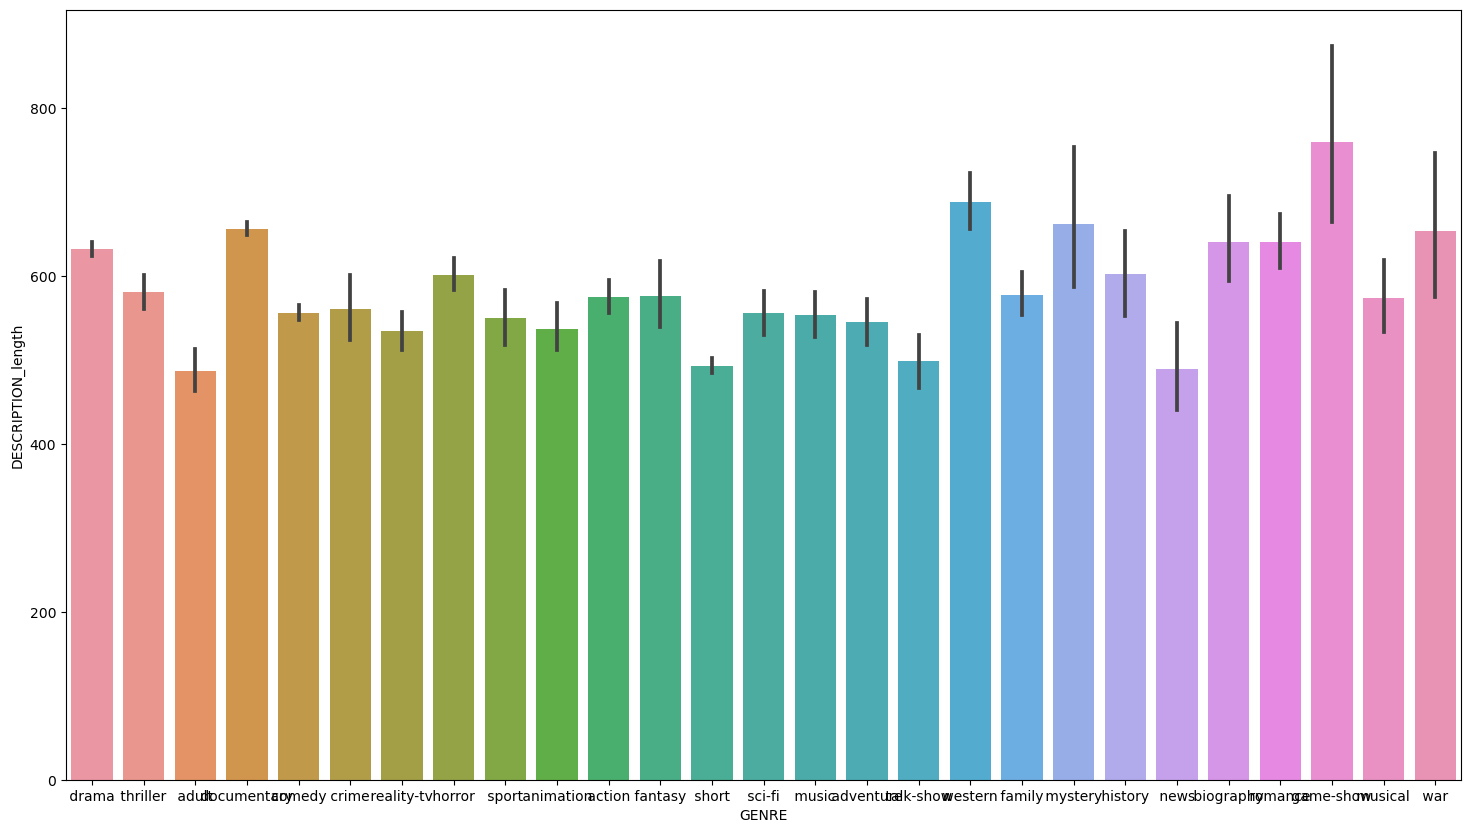

In [17]:
import matplotlib.pyplot as pyp
import seaborn as sns
pyp.figure(figsize=(18,10))
train_data['DESCRIPTION_length']=train_data["DESCRIPTION"].apply(len)
sns.barplot(x='GENRE',y='DESCRIPTION_length',data=train_data)
pyp.show()

### Training and Splitting Data

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

train_data['CLEANED_DESCRIPTION'].fillna("", inplace=True)
test_data['CLEANED_DESCRIPTION'].fillna("", inplace=True)
tf=TfidfVectorizer()
X_train=tf.fit_transform(train_data['CLEANED_DESCRIPTION'])
X_test=tf.transform(test_data['CLEANED_DESCRIPTION'])
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(train_data['GENRE'])
Y_test = label_encoder.transform(test_data_sol['TITLE'])

In [19]:
print(X_train)

  (0, 11631)	0.12722339282643766
  (0, 77208)	0.17779001889944526
  (0, 101432)	0.1439562095038111
  (0, 18103)	0.10642863407479736
  (0, 7457)	0.18654154560997663
  (0, 30980)	0.19447848807687934
  (0, 22112)	0.18826918105919346
  (0, 80040)	0.12476402897671185
  (0, 38201)	0.07707215750947714
  (0, 20513)	0.10145064331069877
  (0, 38526)	0.10140237511176671
  (0, 60867)	0.06660982116987953
  (0, 59568)	0.05268500437847982
  (0, 2741)	0.13325621545424993
  (0, 17534)	0.14871488820265594
  (0, 114313)	0.1566198781535422
  (0, 48430)	0.1341168179821525
  (0, 114870)	0.17671059795122573
  (0, 81562)	0.1142374816812966
  (0, 34014)	0.10968492689435112
  (0, 34835)	0.18075135701616385
  (0, 109597)	0.11670337523024851
  (0, 4727)	0.14218422655465487
  (0, 18543)	0.12711732912098084
  (0, 98490)	0.17671059795122573
  :	:
  (54213, 47580)	0.2097928614392114
  (54213, 84993)	0.1876652304476695
  (54213, 26117)	0.17761329088075248
  (54213, 114121)	0.19997715592519383
  (54213, 36898)	0.187129

### Logistic Regression

In [20]:
# model training on NBC

from sklearn.metrics import accuracy_score,classification_report
lg_model = LogisticRegression()
lg_model.fit(X_train,Y_train)
Y_pred = lg_model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cls = classification_report(Y_test, Y_pred)
print("Accuracy: ",acc)
print(cls)


Accuracy:  0.587380073800738
              precision    recall  f1-score   support

           0       0.53      0.24      0.33      1314
           1       0.59      0.20      0.30       590
           2       0.72      0.13      0.22       775
           3       0.55      0.01      0.02       498
           4       0.00      0.00      0.00       264
           5       0.56      0.58      0.57      7446
           6       0.45      0.02      0.04       505
           7       0.66      0.87      0.75     13096
           8       0.53      0.81      0.64     13612
           9       0.54      0.07      0.13       783
          10       0.00      0.00      0.00       322
          11       0.89      0.52      0.66       193
          12       0.00      0.00      0.00       243
          13       0.66      0.56      0.61      2204
          14       0.68      0.42      0.52       731
          15       1.00      0.00      0.01       276
          16       0.00      0.00      0.00       31

### Navie Bayes Classifier

In [22]:
from sklearn.naive_bayes import MultinomialNB
MNB_model= MultinomialNB()
MNB_model.fit(X_train,Y_train)
y_pred = MNB_model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cls = classification_report(Y_test,Y_pred)
print("Accuracy: ",acc)
print(cls)

Accuracy:  0.587380073800738
              precision    recall  f1-score   support

           0       0.53      0.24      0.33      1314
           1       0.59      0.20      0.30       590
           2       0.72      0.13      0.22       775
           3       0.55      0.01      0.02       498
           4       0.00      0.00      0.00       264
           5       0.56      0.58      0.57      7446
           6       0.45      0.02      0.04       505
           7       0.66      0.87      0.75     13096
           8       0.53      0.81      0.64     13612
           9       0.54      0.07      0.13       783
          10       0.00      0.00      0.00       322
          11       0.89      0.52      0.66       193
          12       0.00      0.00      0.00       243
          13       0.66      0.56      0.61      2204
          14       0.68      0.42      0.52       731
          15       1.00      0.00      0.01       276
          16       0.00      0.00      0.00       31

### Support Vector Machine

In [24]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train,Y_train)
y_test_pred = svc.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(Y_test, y_test_pred))

Test Accuracy: 0.5863468634686347
Test Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.34      0.38      1314
           1       0.64      0.42      0.51       590
           2       0.52      0.22      0.31       775
           3       0.40      0.14      0.20       498
           4       0.00      0.00      0.00       264
           5       0.55      0.59      0.57      7446
           6       0.29      0.07      0.11       505
           7       0.69      0.83      0.75     13096
           8       0.57      0.72      0.63     13612
           9       0.40      0.16      0.23       783
          10       0.32      0.07      0.12       322
          11       0.80      0.65      0.72       193
          12       0.21      0.02      0.04       243
          13       0.61      0.64      0.62      2204
          14       0.63      0.53      0.58       731
          15       0.35      0.07      0.11       276
          16      

In [33]:
def predict_movie(description):
    tf1 = tf.transform([description])
    pred_label = svc.predict(tf1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie ="Vasu Inamdar (Ina) suffers from a disorder where the pictures which he sees comes in his dreams and turn into reality. He discusses this with his wife Shalu and his best friend Digamber Minapure (Mina), Shalu then gets help from Dr A.Z Dcosta (Dika), but Dika turns out to be a fraud and he takes advantage of Shalu and puts her to sleep so that he can avail it in real, Mina comes to know that Dika was taken advantage of and decides to teach him a lesson by bringing the truth in front of everyone."
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "Two individuals find themselves alone after a major explosion that struck their city. Both searching for any signs of life, they stumble upon each other and make the best of what they have. Before they realize the extremity of what happens they have a bit of fun around the city."
print(predict_movie(sample_descr_for_movie1))

 comedy 
 drama 
